In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn. ensemble import RandomForestRegressor

from sklearn import metrics

In [ ]:
gold_data=pd.read_csv('/content/archive (9).zip')

In [ ]:
gold_data.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


In [ ]:
gold_data.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1655,2009-12-07,65.55,71.00,57.6,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.3
1656,2009-12-04,84.95,84.95,66.3,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.0
1657,2009-12-03,72.00,72.00,65.2,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.2
1658,2009-12-02,60.00,60.00,60.0,60.00,60.000000,250.0,3.0,15000.0,250.0,100.00,0.00,0.0
1659,2009-12-01,36.00,50.00,36.0,50.00,49.767758,30141.0,55.0,1500050.0,29000.0,96.21,14.00,14.0


In [ ]:
gold_data.shape

(1660, 13)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1660 non-null   object 
 1   Open                       1660 non-null   float64
 2   High                       1660 non-null   float64
 3   Low                        1660 non-null   float64
 4   Close                      1660 non-null   float64
 5   WAP                        1660 non-null   float64
 6   No. of Shares              1660 non-null   float64
 7   No. of Trades              1660 non-null   float64
 8   Total Turnover             1660 non-null   float64
 9   Deliverable Quantity       1660 non-null   float64
 10  % Deli. Qty to Traded Qty  1660 non-null   float64
 11  Spread H-L                 1660 non-null   float64
 12  Spread C-O                 1660 non-null   float64
dtypes: float64(12), object(1)
memory usage: 168.7+ K

In [ ]:
gold_data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [ ]:
gold_data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


In [ ]:
correlation = gold_data.corr()

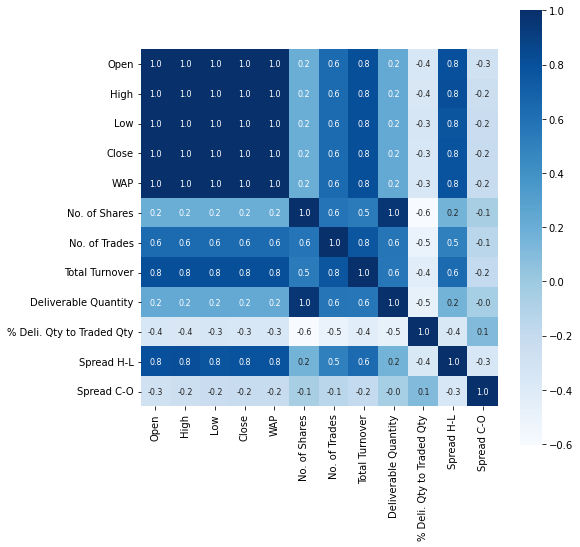

In [ ]:
from numpy.core.fromnumeric import size
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')